In [56]:
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [57]:
import sys
import keras
print('Python: {}'.format(sys.version))
print('keras: {}'.format(keras.__version__))

Python: 3.8.19 (default, Mar 20 2024, 19:55:45) [MSC v.1916 64 bit (AMD64)]
keras: 2.4.3


In [58]:
# load the data
(X_train, y_train), (X_test, y_train) = cifar10.load_data()

In [59]:
# Lets determine the dataset characteristics
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [60]:
# A single image
print(X_train[0].shape)

(32, 32, 3)


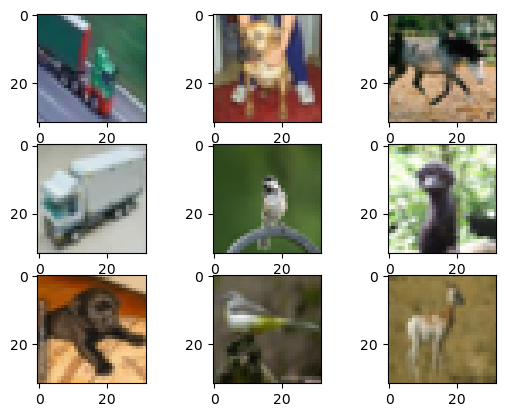

In [61]:
# create a grid of 3x3 images
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img = X_train[50 +i]

    # show the plot
    plt.imshow(img)

In [63]:
# Preprocess the dataset

# fix random seed for reproducibility
seed = 6
np.random.seed(seed)

# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalise the inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test = X_test / 255.0

In [64]:
print(X_train[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [65]:
# class label shape
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [66]:
# [6] = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0] one-hot vector

# hot encode outputs
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_class = Y_test.shape[1]
print(num_class)

print(Y_train.shape)
print(Y_train[0])

10
(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [10]:
# Building the All-CNN

# start by importing necessary layers

from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

In [71]:
# define the model function

def allcnn(weights=None):
    
    #define model type -sequential
    
    model = Sequential()
    
    #add model layers
    model.add(Conv2D(96, (3, 3), padding = 'same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same', strides = (2, 2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3, 3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3, 3),padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3, 3),padding = 'same', strides=(2, 2)))
    model.add(Dropout(0.5))
    

    model.add(Conv2D(192,(3, 3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(1, 1),padding='valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10,(1, 1),padding='valid'))
    
    #add global avg pooling layer with softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    #load the weights
    if weights:
        model.load_weights(weights)
    return model

In [ ]:
# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# build model
model = allcnn()

# define an optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print the model summary
print (model.summary())


#define additional training parameters
epochs = 350
batch_size=32

#fit the model
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=epochs,batch_size=batch_size,verbose =1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 96)        2688      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 96)        83040     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 192)       166080    
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 192)       0

In [72]:
# With pretrained weights to speed things up

# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# build model and define weights
weights ='all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)

# define an optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print the model summary
print (model.summary())




# test the model with pretrained weights
scores = model.evaluate(X_test, Y_test, verbose =1)
print('Accuracy: {}'.format(scores[1]))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_42 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_43 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 16, 16, 192)      

In [73]:
# make a dictionary of class labels and names
classes = range(0,10)
names = ['airplane',
        'automobile',
      'bird',
      'cat',
      'deer',
      'dog',
      'frog',
      'horse',
      'ship',
      'truck']

# zip the names and classes to make a dictionary of class labels
class_labels = dict(zip(classes,names))
print(class_labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [75]:
# generate a batch of 9 images to predict

batch = X_test[150:159]
labels = np.argmax(Y_test[150:159], axis= -1)

#make predictions

predictions = model.predict(batch, verbose=1)

1/1 [==============================] - 0s 1000us/step


In [76]:
# print our predictions
print (predictions.shape)
print (predictions)


(9, 10)
[[2.0787225e-09 2.3202844e-12 2.7908173e-12 2.6167393e-12 5.0829471e-14
  1.6180484e-14 2.5795082e-09 1.3272912e-19 1.0000000e+00 4.2793421e-17]
 [2.2764395e-12 2.9542035e-04 1.1233317e-11 1.0649329e-12 5.9223400e-13
  1.5458948e-14 1.3961182e-13 6.0878580e-10 6.0796794e-13 9.9970454e-01]
 [3.2084391e-10 1.1557211e-12 4.2319620e-08 3.2907591e-04 4.2354240e-09
  9.6776802e-11 9.9967098e-01 1.1048569e-14 1.1722985e-09 1.8152003e-12]
 [1.0000000e+00 6.0933151e-18 1.3000796e-13 3.1114864e-09 1.7305017e-17
  3.9541287e-14 3.0107306e-18 9.5124346e-11 4.1432344e-18 9.9476470e-16]
 [9.9997759e-01 1.7657230e-11 1.1177786e-05 5.1127751e-09 2.5804502e-08
  2.6864280e-09 3.5503149e-07 3.0977607e-10 1.0803732e-05 4.7327933e-09]
 [6.0329703e-26 4.1304851e-25 2.8294292e-12 4.0874319e-08 2.2914230e-17
  1.0000000e+00 8.3176386e-14 3.0264325e-21 2.9074579e-24 2.0812168e-29]
 [2.3415578e-07 3.3992449e-13 9.9998987e-01 4.4850611e-07 9.2423224e-06
  1.5821417e-08 2.7849225e-07 2.5833125e-09 8.3775

In [78]:
# these are class probabilities, should sum to 1 (hmmm)
for image in predictions:
    print(np.sum(image))

1.0
0.99999994
1.0000001
1.0
0.99999994
1.0
1.0000001
1.0
1.0


In [79]:
# use np.argmax() to convert class probabilities to class labels
class_results = np.argmax(predictions, axis=-1)
print(class_results)

[8 9 6 0 0 5 2 9 5]


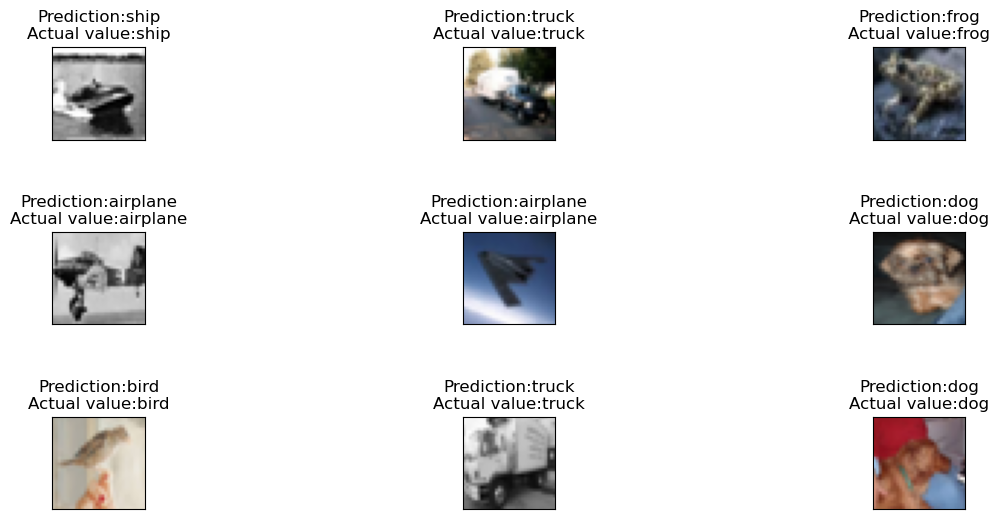

In [80]:
# create a grid of 3x3 images
fig, axs = plt.subplots(3,3,figsize=(15,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()

for i ,img in enumerate(batch):
    
    #determine label for each prediction,set title:
    for key,value in class_labels.items():
        if class_results[i]==key:
            title='Prediction:{}\nActual value:{}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    #plot the image
    
    axs[i].imshow(img)
    
#show the plot
plt.show()

In [41]:
# woo hoo!